2/2 [==============================] - 0s 2ms/step
TensorFlow RMSE: 380.45800944589445


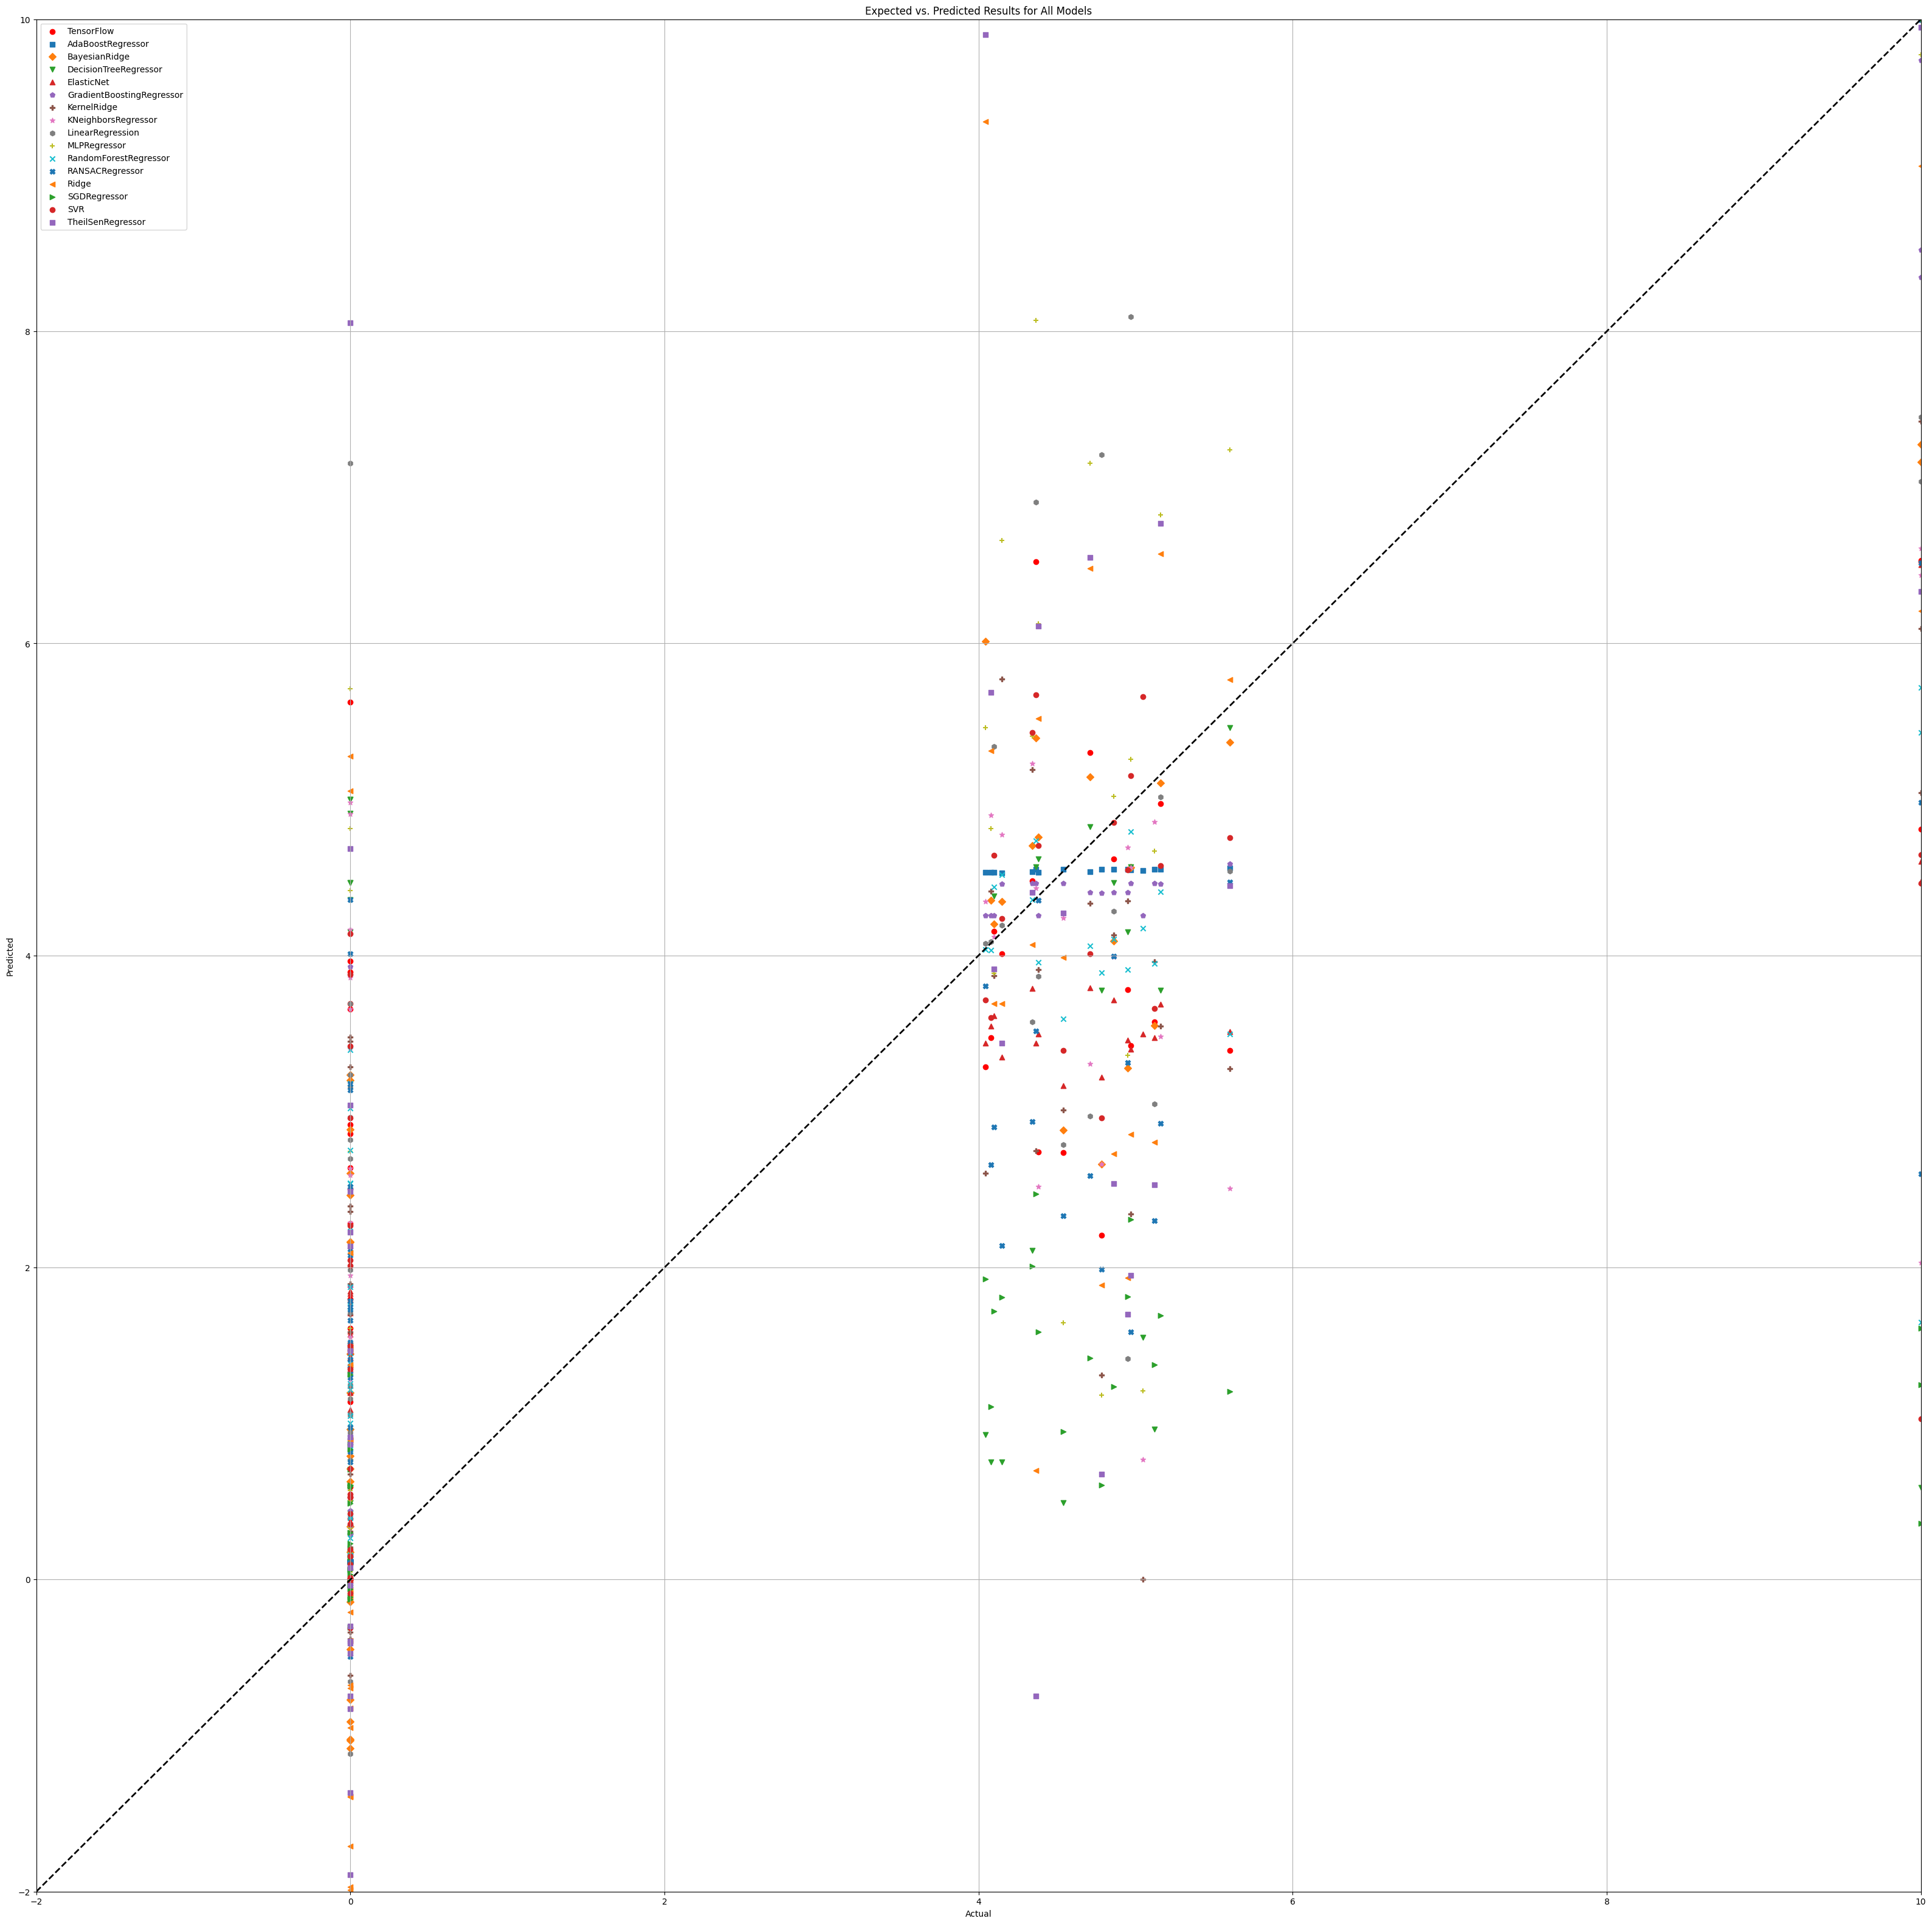

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, ElasticNet, SGDRegressor, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import joblib

# Load the data
file_path = "data_all_numerical_select_reduced.xlsx"
data = pd.read_excel(file_path)

# Define columns
data_columns = [
    'OF2',
    'OF3',
    'OF4',
    'OF5',
    'OF6',
    'OF7',
    'OF8',
    'OF9',
    'OF10',
    'OF11',
    'OF12',
    'OF13',
    'OF14',
    'OF15',
    'OF16',
    'OF17',
    'OF18',
    'OF19',
    'OF20',
    'OF21',
    'OF22',
    'OF23',
    'OF24',
    'OF25',
    'OF26',
    'OF27',
    'OF28',
    'OF29',
    'OF30',
    'OF31',
    'OF32',
    'OF33',
    'OF34',
    'OF37',
    'OF38',
    'F1',
    'F2',
    'F3_1',
    'F3_2',
    'F3_3',
    'F3_4',
    'F3_5',
    'F3_6',
    'F3_7',
    'F4',
    'F5',
    'F6',
    'F7',
    'F8',
    'F9',
    'F10',
    'F11',
    'F12',
    'F13',
    'F14',
    'F15',
    'F16',
    'F17',
    'F18',
    'F19',
    'F20',
    'F21',
    'F22',
    'F23',
    'F24',
    'F25',
    'F26',
    'F27',
    'F28',
    'F29',
    'F30',
    'F31',
    'F32',
    'F33',
    'F34',
    'F35',
    'F36',
    'F37',
    'F38',
    'F39',
    'F40',
    'F41',
    'F42',
    'F43',
    'F44',
    'F45',
    'F46',
    'F47',
    'F48',
    'F49',
    'F50',
    'F51',
    'F52',
    'F53',
    'F54',
    'F55',
    'F56',
    'F57',
    'F58',
    'F59',
    'F62',
    'F63',
    'F64',
    'F65',
    'F66',
    'F67',
    'F68',
    'S1',
    'S2',
    'S3',
    'S4',
    'S5',
    'S6',
    'PC',
    'FC',
    'WRI',
    'SVT',
    'VCHWC',
    'HWCC',
    'MC',
    'PP',
    'ST',
    'SWP',
    'DP',
    'ADLM',
    'ATDO',
    'AOD'
]

results_columns = ['SR_Benefit']

# Prepare data for regression
X = data[data_columns]
y = data[results_columns[0]]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load trained models and their weights
model_directory = "SR_Benefit"

best_models = {}

# Load TensorFlow model
tensorflow_model_filename = './SR_Benefit/TensorFlow_model.h5'
model_tf = tf.keras.models.load_model(tensorflow_model_filename)
scaler_tf = joblib.load("./SR_Benefit/scaler_tf.pkl")

# Standardize the test data for TensorFlow model
X_test_scaled_tf = scaler_tf.transform(X_test)

# Evaluate the TensorFlow model
y_pred_tf = model_tf.predict(X_test_scaled_tf)
rmse_tf = mean_squared_error(y_test, y_pred_tf, squared=False)
print(f"TensorFlow RMSE: {rmse_tf}")

# Add TensorFlow model to best_models
best_models['TensorFlow'] = (model_tf, y_pred_tf)

# Load other models
sklearn_model_filenames = [filename for filename in os.listdir(model_directory) if filename.endswith("_model.pkl")]

# Define markers for different models
markers = ['o', 's', 'D', 'v', '^', 'p', 'P', '*', 'h', '+', 'x', 'X', '<', '>']

for idx, filename in enumerate(sklearn_model_filenames):
    model_name = filename.split("_")[0]
    model = joblib.load(os.path.join(model_directory, filename))
    y_pred = model.predict(X_test)
    best_models[model_name] = (model, y_pred)

# Plot expected vs. predicted results for all models on the same graph
plt.figure(figsize=(40, 40))

# Plot predictions for TensorFlow model
plt.scatter(y_test, np.clip(y_pred_tf, -20, 20), color='red', label='TensorFlow', marker='o')

# Plot predictions for other models
for idx, (model_name, (model, y_pred)) in enumerate(best_models.items()):
    if model_name != 'TensorFlow':
        marker = markers[idx % len(markers)]  # Cycle through markers
        plt.scatter(y_test, np.clip(y_pred, -20, 20), label=model_name, marker=marker)

plt.plot([-2, 10], [-2, 10], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Expected vs. Predicted Results for All Models')
plt.legend()
plt.grid(True)
plt.xlim([-2, 10])
plt.ylim([-2, 10])

output_filename = "./SR_Benefit/all_models_predictions_plot.png"
plt.savefig(output_filename)
plt.show()
